<h1> Intro to CNN </h1>

<h3> What is CNN </h3>
<p> &nbsp;&nbsp; CNN is basically a form of Convolutional Neural Network which basically makes work alot easier by doing feature extraction portion for us hence its a part of Deep Learning Neural Nets </p>

<b> It works on 2 levels they are: 
    <ol>
        <li> Feature Extraction </li>
        <li> Neural Network </li>
    <ol>
</b>

<h4>1. Feature Extraction </h4>
<p> Initially an Image is sent to the CNN as input, This input image is mapped against vairous filters using convlution process  which are initally pretty simple filters later on gets more complicated to account for the fact that weather the image contains the character we are interested or not. Depending upon its finding a feature map is created which is then drastically shrinked using the concept of pooling specially maxpooling. In this manner a reduced feature map is obtained and finally the feature map is flattened to convert it into 1 large input for a Neural Network which will predict based on the input provided</p>

<h4>2. Neural Network </h4>
<p> This is basically a fully connected Neural Network which will learn to get the flattned feature map as input and based on that predict weather an image is of a particular class or not. It works regardless of the orientation of the image </p>

<img src="https://vitalflux.com/wp-content/uploads/2021/11/VGG16-CNN-Architecture.png">

<h3> 0. Installing Dependencies </h3>

<p> Here we will install basic depdencies required for our CNN based project some of them are: 
    <ol>
        <li>tensorflow </li>
        <li>numpy </li>
        <li>matplotlib</li>
    </ul>
</p>

In [159]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

<h3> 1. Importing Libraries and Dependencies </h3>

In [160]:
import tensorflow as tf 
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt
import os

<h3> 2. Importing Data set </h3>
<p> We are going to work with MNIST dataset for 0-9 handwritten characters which can be imported directly from tensorflow </p>

Output of the image: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of the image: (28, 28, 1)


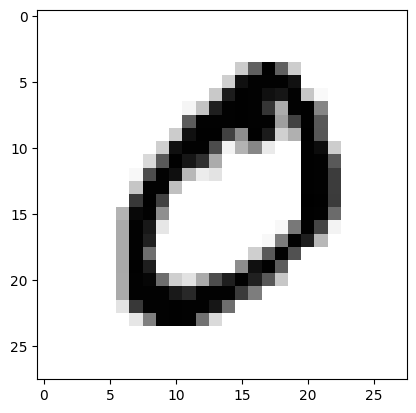

In [161]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()

xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))

xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))
# one hot encode target values since the output exists in continous form
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest= tf.keras.utils.to_categorical(ytest)

#See the particular image from index 
plt.imshow(xtrain[1],cmap=plt.cm.binary)
print(f'Output of the image: {(ytrain[1])}')

print(f'Shape of the image: {xtrain[0].shape}') #The image dimensions are 28x28



<h3> 3.Creating our model </h3> 


Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_239 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_160 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_240 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_161 (MaxPooli  (None, 5, 5, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_241 (Conv2D)         (None, 3, 3, 64)          36928     
                                                                 
 flatten_78 (Flatten)        (None, 576)             

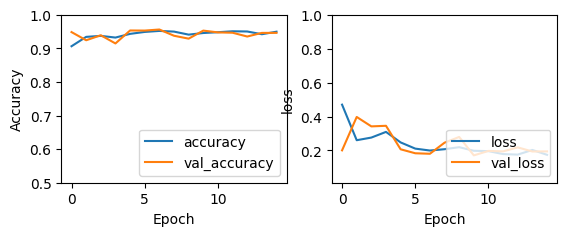

In [164]:
def create_cnn_model():
    model=tf.keras.models.Sequential() #if imported from tensorflow.keras import models we would write models.Sequential
    
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.summary()
    return model

def plot_metrics_for_training(history):
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    plt.subplot(222)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0.01, 1])
    plt.legend(loc='lower right')

CNN_model=create_cnn_model()
history_for_plotting=CNN_model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest),shuffle=True)
plot_metrics_for_training(history_for_plotting)


<h3> 4. Saving Your Model </h3>
<p> Since our model has been trained properly we are going to save it so that we can load it from current progress for future use </p>

In [165]:
def create_folder():
    try:
        os.mkdir('Model')
    except:
        pass

create_folder()    
CNN_model.save_weights('Model\\SS_Model.h5')

<h3>5. Loading Model and Predicting </h3>
<p> Here we are going to load the weights from the model and use it to predict on test dataset to visually see the result </p>

<h4>5.1. Loaded Model accuracy and errors </h4>
<p> We fetch the weights from the model and check the summary of the model with its accuracy and errors that should be same as previously trained one.</p>

In [166]:
Loaded_model=create_cnn_model()
Loaded_model.load_weights('Model\\SS_Model.h5')

#Display the results from previous weights on test cases 
print(Loaded_model.evaluate(xtest,ytest))


Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_242 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_162 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_243 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_163 (MaxPooli  (None, 5, 5, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_244 (Conv2D)         (None, 3, 3, 64)          36928     
                                                                 
 flatten_79 (Flatten)        (None, 576)             

<h4> 5.2. Predict from Loaded Model (From Dataset) </h4>
<p> We will now use the model to predict the output from the array of inputs </p>

1/1 [==============================] - 0s 46ms/step
Predicted by Model: 3


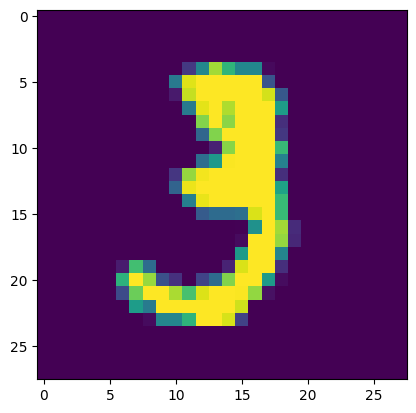

In [167]:
#Provide value and on that basis its going to fetch one value
index=int(input(f'Enter value between 0 to {len(xtrain)}: '))
plt.imshow(xtrain[index])
output=Loaded_model.predict(xtrain[index].reshape(1,28,28,1))
output=np.argmax(output[0])
print(f"Predicted by Model: {output}")
#print(Loaded_model.predict())

<h4>5.3. Predict From image </h4>

1/1 [==============================] - 0s 15ms/step
3


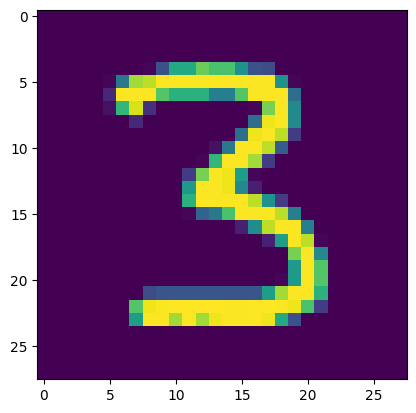

In [172]:
def load_image(filename):
    # load the image
    img = tf.keras.utils.load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = tf.keras.utils.img_to_array(img)
    # reshape into a single sample with 1 channel
    plt.imshow(img)
    img = img.reshape(1, 28, 28, 1)
    return img

img=load_image('Test_images\\test_img_2.png')
print(np.argmax(Loaded_model.predict(img)))
